<a href="https://colab.research.google.com/github/rtajeong/M2_2025/blob/main/gg_28_%ED%81%B4%EB%9F%AC%EC%8A%A4%ED%84%B0%EB%A7%81%EB%B9%84%EA%B5%90_rev2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Cluster Analysis
<hr>

### Agenda
1. Introduction to Unsupervised Learning
2. Clustering
3. Similarity or Distance Calculation
4. Clustering as an Optimization Function
5. Types of Clustering Methods
6. Partitioning Clustering - KMeans & Meanshift
7. Hierarchial Clustering - Agglomerative
8. Density Based Clustering - DBSCAN
9. Measuring Performance of Clusters
10. Comparing all clustering methods

<hr>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [ ]:
from sklearn.datasets import make_blobs

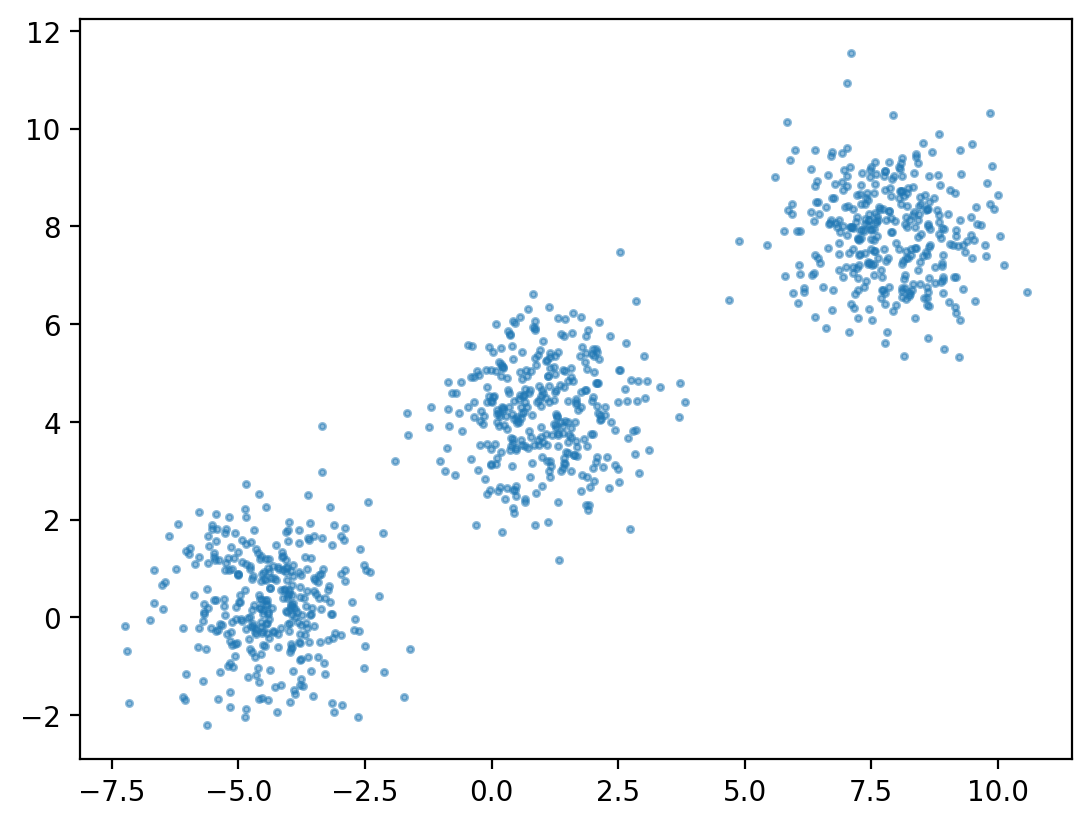

In [ ]:
X,y = make_blobs(n_features=2, n_samples=1000, centers=3,
                 cluster_std=1, random_state=3)       # Generate isotropic Gaussian blobs for clustering
plt.scatter(X[:,0], X[:,1], s=5, alpha=.5)

### 3. Distance or Similarity Function (유사도)
* Data belonging to same cluster are similar & data belonging to different cluster are different.
* We need mechanisms to measure similarity & differences between data.
* This can be achieved using any of the below techniques.

 - Minkowiski breed of distance calculation:

 <img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/4060cc840aeab9e41b5e47356088889e2e7a6f0f">

 - Manhatten (p=1), Euclidian (p=2)

 - Cosine: Suited for text data

 <img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/1d94e5903f7936d3c131e040ef2c51b473dd071d">

In [ ]:
from sklearn.metrics.pairwise import euclidean_distances,cosine_distances,manhattan_distances

In [ ]:
X = [[0, 1], [1, 1]]
euclidean_distances(X, X)

array([[0., 1.],
       [1., 0.]])

In [ ]:
euclidean_distances(X, [[0,0]])

array([[1.        ],
       [1.41421356]])

In [ ]:
cosine_distances(X,X)

array([[0.        , 0.29289322],
       [0.29289322, 0.        ]])

In [ ]:
manhattan_distances(X,X)

array([[0., 1.],
       [1., 0.]])

### 5. Types of Clustering
* Partitioning methods
  - Partitions n data into k partitions
  - Initially, random partitions are created & gradually data is moved across different partitions.
  - It uses distance between points to optimize clusters.
  - KMeans & Meanshift are examples of Partitioning methods
* Hierarchical methods
  - These methods does hierarchical decomposition of datasets.
  - One approach is, assume each data as cluster & merge to create a bigger cluster
  - Another approach is start with one cluster & continue splitting
* Density-based methods
  - All above techniques are distance based & such methods can find only spherical clusters and not suited for clusters of other shapes.
  - Continue growing the cluster untill the density exceeds certain threashold.
* GMM (Gaussian Mixture Model)

### 6. Partitioning Method
#### KMeans
* Minimizing creteria : within-cluster-sum-of-squares.

<img src="https://github.com/awantik/machine-learning-slides/blob/master/kmeans2.png?raw=true">

* The centroids are chosen in such a way that it minimizes within cluster sum of squares.

* The k-means algorithm divides a set of $N$ samples $X$ into $K$ disjoint clusters $C$, each described by the mean  of the samples in the cluster. $\mu$

<img src="https://cssanalytics.files.wordpress.com/2013/11/cluster-image.png" width="300px">

##### KMeans Algorithm
1. Initialize k centroids.
2. Assign each data to the nearest centroid, these step will create clusters.
3. Recalculate centroid - which is mean of all data belonging to same cluster.
4. Repeat steps 2 & 3, till there is no data to reassign a different centroid.

Animation to explain algo - http://tech.nitoyon.com/en/blog/2013/11/07/k-means/

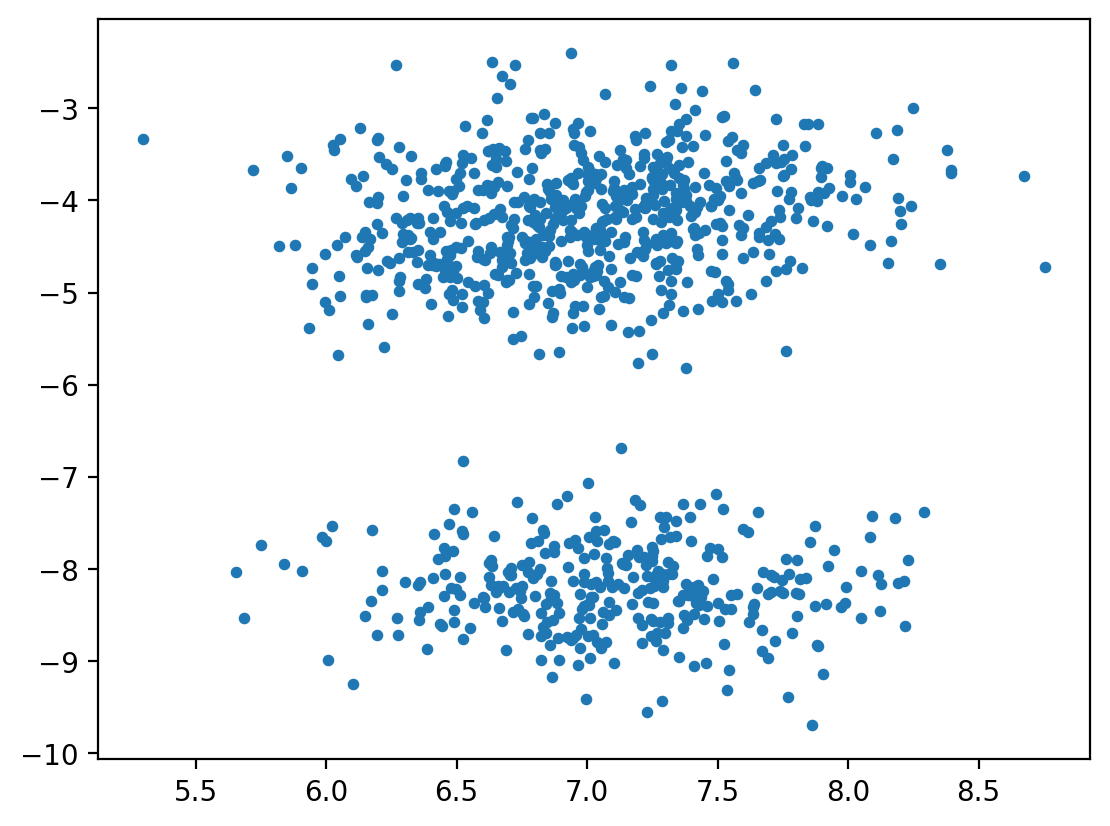

In [ ]:
from sklearn.datasets import make_blobs, make_moons

X,y = make_blobs(n_features=2, n_samples=1000, cluster_std=0.5)
# n_featues: no of features for each sample
# cluster_std: The standard deviation of the clusters.
plt.scatter(X[:,0], X[:,1],s=10)

In [ ]:
from sklearn.cluster import KMeans, MeanShift

kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

KMeans(n_clusters=3)

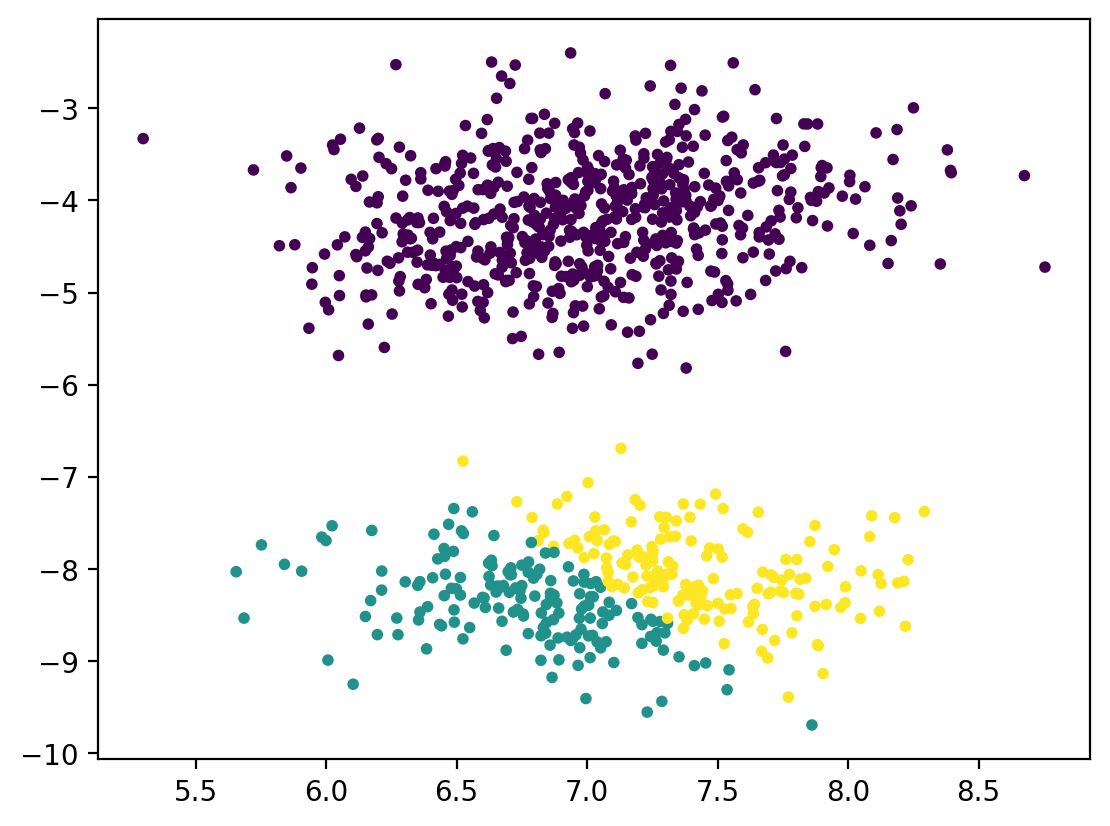

In [ ]:
plt.scatter(X[:,0], X[:,1],s=10, c=kmeans.predict(X))

In [ ]:
kmeans.predict(X)

array([0, 0, 1, 0, 0, 2, 2, 2, 2, 0, 2, 0, 0, 2, 0, 1, 2, 1, 0, 0, 2, 0,
       1, 2, 0, 2, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 2,
       0, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 0, 0, 0, 0, 2, 0, 2, 0, 1, 0, 1,
       1, 0, 0, 2, 0, 1, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 2, 0, 0, 2, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       2, 0, 0, 0, 0, 1, 1, 1, 0, 2, 1, 2, 0, 2, 1, 0, 1, 0, 0, 0, 2, 0,
       0, 0, 0, 2, 2, 1, 1, 2, 0, 0, 0, 0, 0, 2, 0, 1, 2, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 2, 0, 2, 0, 0, 0, 1, 0, 2, 2, 0,
       1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 1, 0, 0, 0, 0, 0, 0,
       2, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 2, 0, 0, 0, 0, 2, 1, 0, 2, 1, 0, 0, 1, 2, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 1, 0, 0,
       0, 0, 0, 0, 2, 2, 0, 0, 0, 1, 0, 1, 0, 0, 1,

#### Meanshift (mode-seeking algorithm)
- 밀도 기반 군집화 알고리즘으로, 데이터의 특성 공간에서 밀집된 영역을 찾아 군집을 형성
- 동작:
  - 초기화: 각 데이터 포인트를 잠정적인 중심으로 설정
  - 밀도 계산: 특정 반경(bandwidth) 내의 데이터 분포를 커널 함수(보통 Gaussian)로 추정
  - 평균 이동: 각 데이터 포인트는 주변 데이터의 평균 위치로 이동한다. 이 평균 위치는 데이터가 밀집된 영역의 중심을 가리킨다.
  - 수렴: 중심이 더 이상 크게 동이동하지 않을 때 멈춤
  - 군집 형성: 가까운 중심점으로 모인 데이터들을 하나의 군집으로 정의

* Centroid based hierarchical clustering algorithm.(also known as mode-seeking algorithm)
* Mode can be understood as highest density of data points.
* Mean Shift is a hierarchical clustering algorithm. As opposed to K-Means, when using Mean Shift, you don’t need to know the number of categories (clusters) beforehand. The downside to Mean Shift is that it is computationally expensive — O(n²).
- 즉, 추정된 KDE 분포에서 가장 밀도가 높은 (mode 값) 쪽으로 이동시켜 감.

In [ ]:
centers = [[1, 1], [-.75, -1], [1, -1], [-3, 2]]
X, _ = make_blobs(n_samples=1000, centers=centers, cluster_std=0.6)

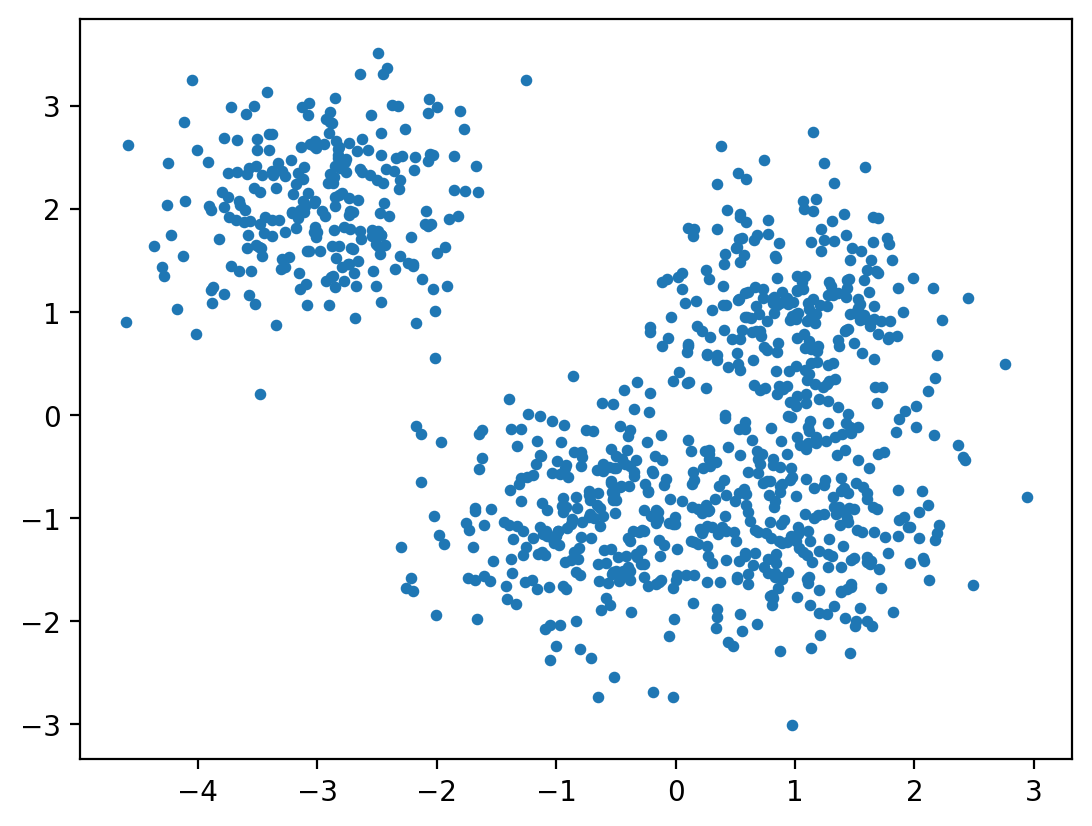

In [ ]:
plt.scatter(X[:,0], X[:,1],s=10)

In [ ]:
kmeans = KMeans(n_clusters = 4)
kmeans.fit(X)
ms = MeanShift(bandwidth=2.0) # 반경을 2.0으로 직접 설정 (중요 hyperparameter)
ms.fit(X)

MeanShift(bandwidth=2.0)

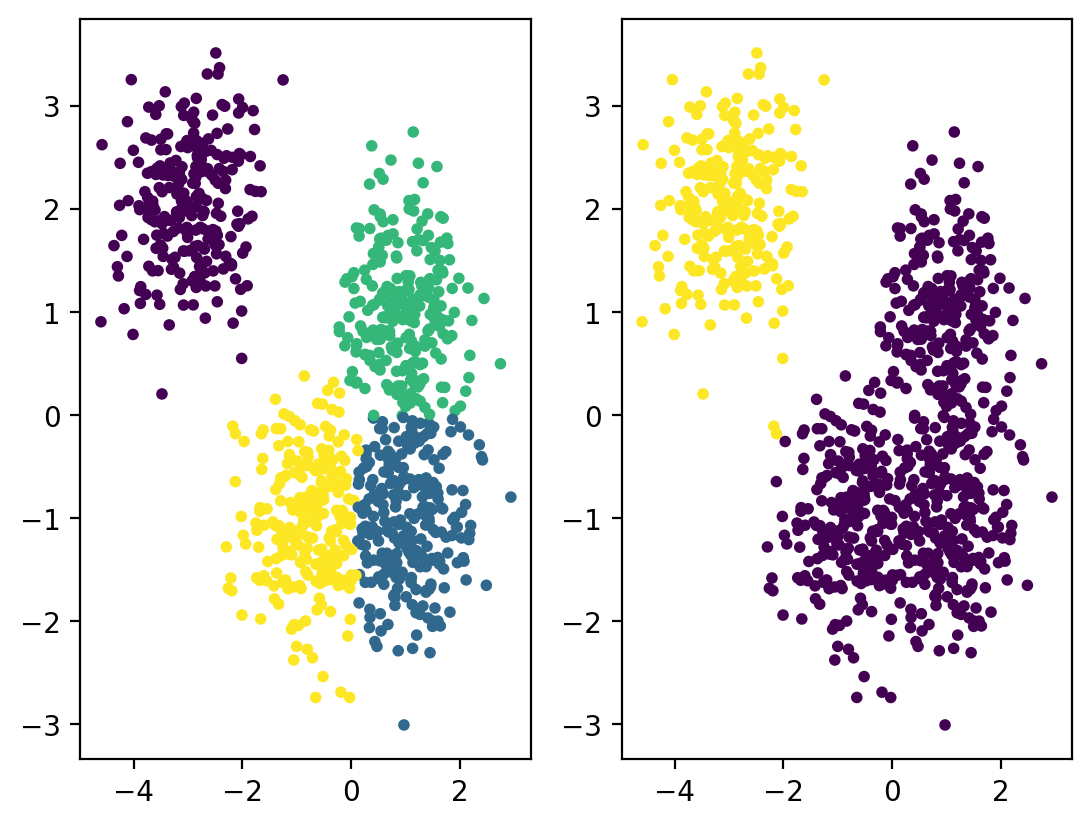

In [ ]:
plt.subplot(1,2,1)
plt.scatter(X[:,0], X[:,1],s=10, c=kmeans.predict(X))
plt.subplot(1,2,2)
plt.scatter(X[:,0], X[:,1],s=10, c=ms.predict(X))

### 7. Hierarchial Clustering
* A method of clustering where you combine similar clusters to create a cluster or split a cluster into smaller clusters such they now they become better.
* Two types of hierarchaial Clustering
  - Agglomerative method, a botton-up approach.
  - Divisive method, a top-down approach.

#### Agglomerative method
* Start with assigning one cluster to each data.
* Combine clusters which have higher similarity.
* Differences between methods arise due to different ways of defining distance (or similarity) between clusters. The following sections describe several agglomerative techniques in detail.
  - Single Linkage Clustering
  - Complete linkage clustering
  - Average linkage clustering
  - Average group linkage

### 8. Density Based Clustering - DBSCAN
- Kmeans and Meanshift are centroid-based, and they have predict() method.
- But, DBSCAN does not have predict() method.
- The definition of clusters depends on the data itself.
- Adding a new data point could potentially change the density landscape and even existing cluster boundaries.
- Predicting cluster labels for entirely new data using the existing model becomes less straightforward.
- for the new data, you have to re-run the model.

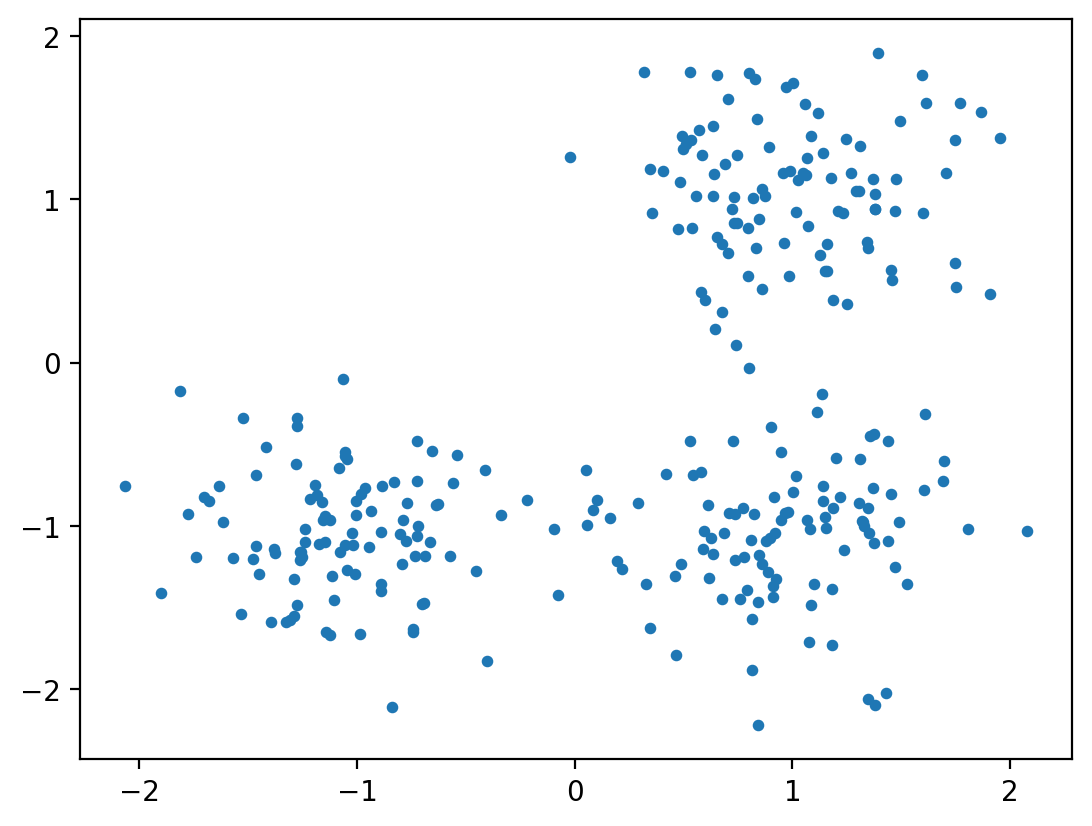

In [ ]:
centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(n_samples=300, centers=centers, cluster_std=0.4,
                            random_state=0)
plt.scatter(X[:,0], X[:,1],s=10)

In [ ]:
from sklearn.cluster import DBSCAN

from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X)

db = DBSCAN(eps=0.3, min_samples=10)
db.fit(X)
labels = db.labels_   # Cluster labels for each point in the dataset given to fit().
                      # Noisy samples are given the label -1.

In [ ]:
kmeans = KMeans(n_clusters = 4)
kmeans.fit(X)
ms = MeanShift()
ms.fit(X)

MeanShift()

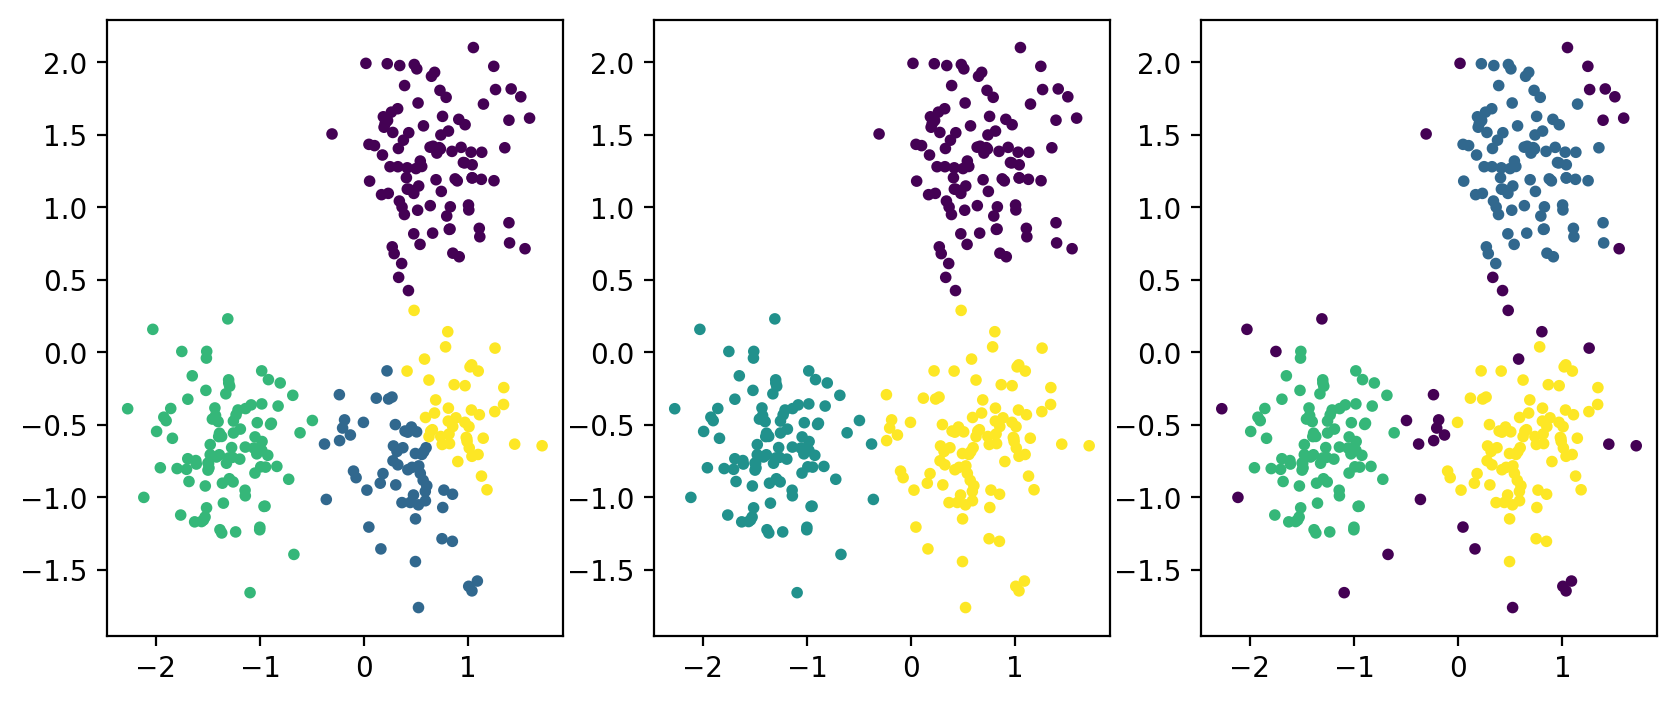

In [ ]:
plt.figure(figsize=(10,4))
plt.subplot(1,3,1)
plt.scatter(X[:,0], X[:,1],s=10, c=kmeans.labels_) # kmeans.predict(X) = kmeas.labels_
plt.subplot(1,3,2)
plt.scatter(X[:,0], X[:,1],s=10, c=ms.labels_)     # ms.predict(X) = ms.labels_
plt.subplot(1,3,3)
plt.scatter(X[:,0], X[:,1],s=10, c=db.labels_)     # does not have predict() method

In [ ]:
db.labels_

array([ 0, -1,  1,  0,  0,  1,  2, -1,  1,  0,  2,  0,  0, -1,  0, -1,  2,
        2,  2,  2,  0,  0,  0,  0,  2,  0,  2,  1,  2,  1,  1,  2,  0,  1,
        2,  1,  1,  1,  1,  0,  0, -1, -1,  0,  1,  2,  2,  2,  2,  0,  0,
        0,  2,  1,  1,  1,  1,  0,  1,  0,  2, -1,  1,  2,  2,  2, -1, -1,
        1,  0,  1,  2,  0,  0,  2,  2,  1,  1,  0,  2,  1, -1,  2,  1,  1,
        0,  0, -1, -1,  0,  1,  0, -1, -1,  1,  0,  1,  2,  0,  2,  0,  0,
       -1,  0,  0, -1,  1,  2,  1,  1,  1,  1,  1, -1,  0,  1, -1,  2,  1,
        2,  1,  1, -1,  1,  1,  1,  0, -1,  2,  2,  0,  2,  2,  1,  0,  1,
        0,  2,  1,  0,  2,  2, -1,  0,  2,  0,  1,  2, -1,  1,  1, -1,  0,
        0,  1,  0,  1,  0,  0,  0,  0,  2,  1, -1, -1,  2,  2,  1,  0,  0,
        0,  2,  2,  0,  0, -1,  0,  2,  2, -1,  2,  0,  0,  1,  2,  0, -1,
        2,  0,  1, -1,  1,  0,  2,  1,  2,  0,  2,  0,  2,  0, -1,  2,  1,
        1,  1,  1,  0,  2, -1, -1,  1,  1,  1, -1,  2,  0,  0,  2,  0,  1,
        1,  0,  1,  2,  2

### 9. Measuring Performance of Clusters
* Two forms of evaluation
* supervised, which uses a ground truth class values for each sample.
  - completeness: all members of a given class are assigned to the same cluster.
  - homogeneity: each cluster contains only members of a single class.
* unsupervised, which measures the quality of model itself
  - silhoutte_score
  - calinski_harabaz_score

## Scores:
- completeness_score (완전성):
  - 같은 클래스에 속하는 데이터 포인트가 모두 같은 클러스터에 할당되는 정도
  - 높은 완전성은 동일한 클래스에 속하는 데이터 포인트가 분리되지 않고 하나의 클러스터에 잘 그룹화되었음을 의미

- homogeneity_score (동질성):
  - 각 클러스터가 단일 클래스의 데이터 포인트만 포함하는 정도
  - 높은 동질성은 각 클러스터가 서로 다른 클래스의 데이터 포인트로 혼합되지 않고 하나의 클래스로 구성되었음을 의미

- 완전성은 클러스터 내 데이터 포인트의 순수성에 초점을 맞추는 반면, 동질성은 클러스터 간 데이터 포인트의 분리에 초점을 맞춤.
- 군집화 알고리즘의 성능을 평가하기 위해서는 완전성과 동질성을 모두 고려하는 것이 중요함

In [ ]:
from sklearn.metrics.cluster import completeness_score, homogeneity_score

In [ ]:
completeness_score( labels_true=[10,10,11,11],labels_pred=[1,1,0,0]), \
completeness_score( labels_true=[11,22,22,11],labels_pred=[1,0,1,0]), \
completeness_score([10, 10, 11, 11], [0, 0, 0, 0]), \
completeness_score([0, 0, 1, 1], [0, 1, 2, 3])

(np.float64(1.0), np.float64(0.0), 1.0, np.float64(0.49999999999999994))

In [ ]:
homogeneity_score( labels_true=[11,22,22,11],labels_pred=[1,0,1,0]), \
homogeneity_score([10, 10, 11, 11], [0, 0, 0, 0]), \
homogeneity_score([0, 0, 1, 1], [0, 1, 2, 3]), \
homogeneity_score([0, 0, 0, 0], [1, 1, 0, 0])

(np.float64(0.0), 0.0, np.float64(0.9999999999999999), 1.0)

#### silhoutte_score
- 각 데이터 포인트가 얼마나 잘 할당된 클러스터에 위치했는지 측정
- 실루엣 점수가 높을수록 군집화가 더 잘되었음을 의미하며, 데이터 포인트들이 각자의 클러스터 내에서 서로 가까이 밀집되어 있고, 이웃 클러스터들과는 멀리 떨어져 있는 것을 나타냄

In [ ]:
from sklearn.datasets import make_blobs
X, Y = make_blobs(n_samples=500,
                  n_features=2,
                  centers=4,
                  cluster_std=1,
                  center_box=(-10.0, 10.0),
                  shuffle=True,
                  random_state=1)

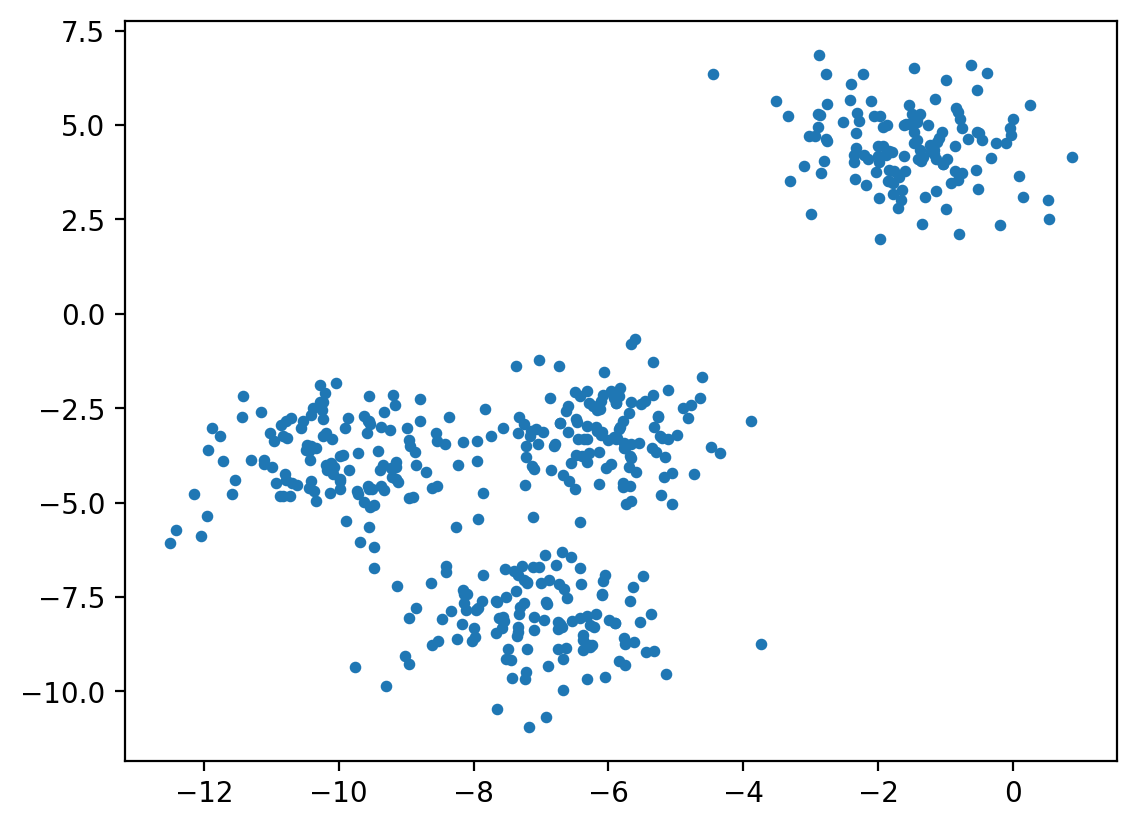

In [ ]:
plt.scatter(X[:,0],X[:,1],s=10)

In [ ]:
range_n_clusters = [2, 3, 4, 5, 6]

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [ ]:
for n_cluster in range_n_clusters:
    kmeans = KMeans(n_clusters=n_cluster, n_init=50)
    kmeans.fit(X)
    labels = kmeans.predict(X)
    print (n_cluster, silhouette_score(X, labels))

2 0.7049787496083262
3 0.5882004012129721
4 0.6505186632729437
5 0.5743946554642042
6 0.45290092039779745


* Optimal number of clusters seems to be 2

#### calinski_harabaz_score
- 군집 내 분산과 군집 간 분산의 비율을 계산하여 군집화의 밀집성을 평가
- 높은 밀집성은 군집이 서로 가깝고, 각 군집이 뚜렷하게 구분되어 있는 것을 나타낸다.
- 높을수록 좋은 군집

In [ ]:
from sklearn.metrics import calinski_harabasz_score

for n_cluster in range_n_clusters:
    kmeans = KMeans(n_clusters=n_cluster, n_init=50)
    kmeans.fit(X)
    labels = kmeans.predict(X)
    print (n_cluster, calinski_harabasz_score(X,labels))

2 1604.112286409658
3 1809.991966958033
4 2704.4858735121097
5 2282.1610642050177
6 2043.4564322271594


- 이 두 개의 점수는 각각 특징이 있으며 주로 간단한 경우에는 실루엣 스코어를 선호함.

--------------------------------